In [376]:
import networkx as nx
from gurobipy import *
import osmnx as ox
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import import_ipynb
import copy

In [377]:
def get_extreme_points(coordinates):
    df2=coordinates.sort_values(by='x')
    df3=df2.sort_values(by='y')
    t = np.round(list(df3.iloc[0])[0],0)
    df2=coordinates.sort_values(by='x',ascending=False)
    df3=df2.sort_values(by='y',ascending=False)
    s = np.round(list(df3.iloc[0])[0],0)
    return s, t

In [378]:
def myplot(G, pos, color, NodeSize, LineWidth):
    plt.rcParams['figure.figsize'] = [8, 10]
    nx.draw_networkx_nodes(G,pos,nodelist=G.nodes(data=False),node_size=NodeSize,node_color=color)
    nx.draw_networkx_edges(G,pos,edgelist=G.edges(data=False),width=LineWidth,arrows=False)
    # nx.draw_networkx_labels(G,pos,labels=label_list)
    plt.show()

In [379]:
# place_name = 'Chicago, IL, USA'
place_name = 'Champaign, IL, USA'
H=ox.graph_from_place(place_name, network_type='drive')
# H=ox.graph_from_place(place_name, custom_filter=['highway'])
G = nx.DiGraph(H)

In [380]:
# pos=nx.spring_layout(G)
pos={}  # For map like graphs
coordinates = pd.DataFrame(columns=['ID','x','y'])
for u, data in G.nodes(data=True):
    pos[u]=(data['x'],data['y'])
    coordinates.loc[len(coordinates.index)]=[int(u),data['x'],data['y']]

In [381]:
gas_stations=[]
color=[]; NodeSize = []
label_list={}
s, t = get_extreme_points(coordinates)
print(s,t)
for i in G.nodes():
    if i == s:
        color.extend(['k'])
        NodeSize.extend([20])
    elif i == t:
        color.extend(['k'])
        NodeSize.extend([20])
    else:
        if np.random.rand() < 0.05:
            gas_stations.append(i)
            label_list[i]=str(i)
            color.extend(['r'])
            NodeSize.extend([10])
        else:
            color.extend(['b'])
            label_list[i]=''
            NodeSize.extend([1])
print('#stations:',len(gas_stations),'\n#nodes:' ,G.number_of_nodes())

6564045080.0 38093814.0
#stations: 108 
#nodes: 2170


In [382]:
LineWidth={}
itercount=0
print(G.number_of_edges())
edgelist=copy.deepcopy(G.edges())
for u,v in edgelist:
    itercount +=1
    if u==v:
        G.remove_edge(u,v)
        continue
    # LineWidth.extend([0.5])
    if (u,v) in LineWidth.keys():
        G.remove_edge(u,v)
        continue
    LineWidth[(u,v)]=0.01
plist = list(LineWidth.values())

6125


In [383]:
from itertools import islice
def k_shortest_paths(G, source, target, k, weight='length'):
    return list(
        islice(nx.shortest_simple_paths(G, source, target, weight=weight), k)
    )
paths = k_shortest_paths(G, s, t, 5)

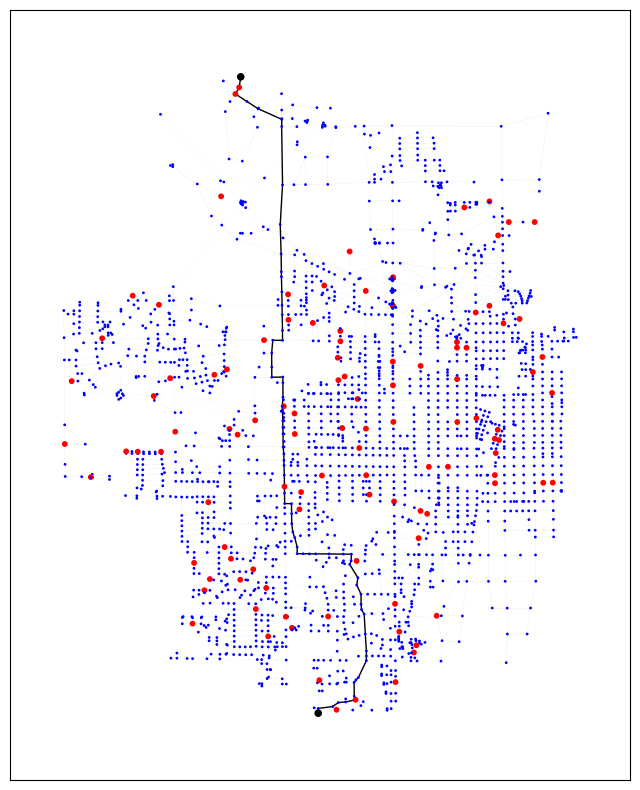

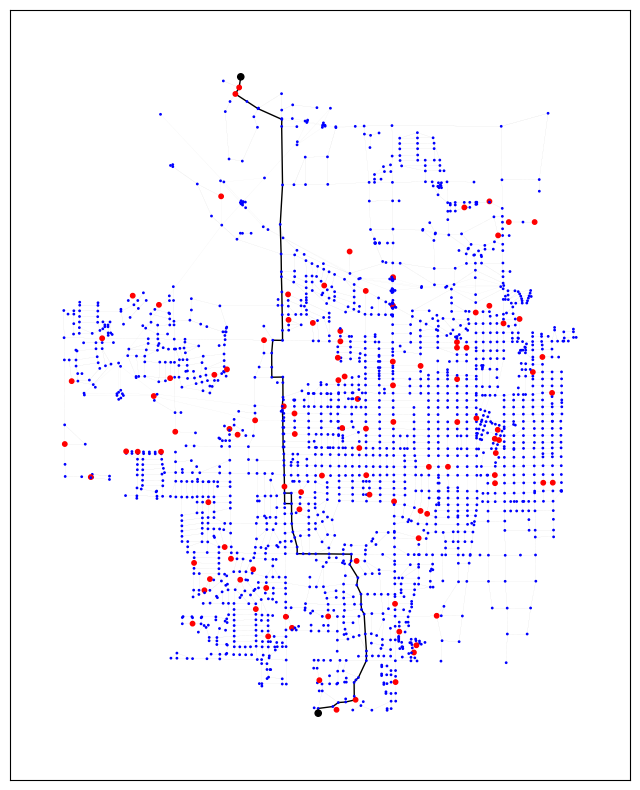

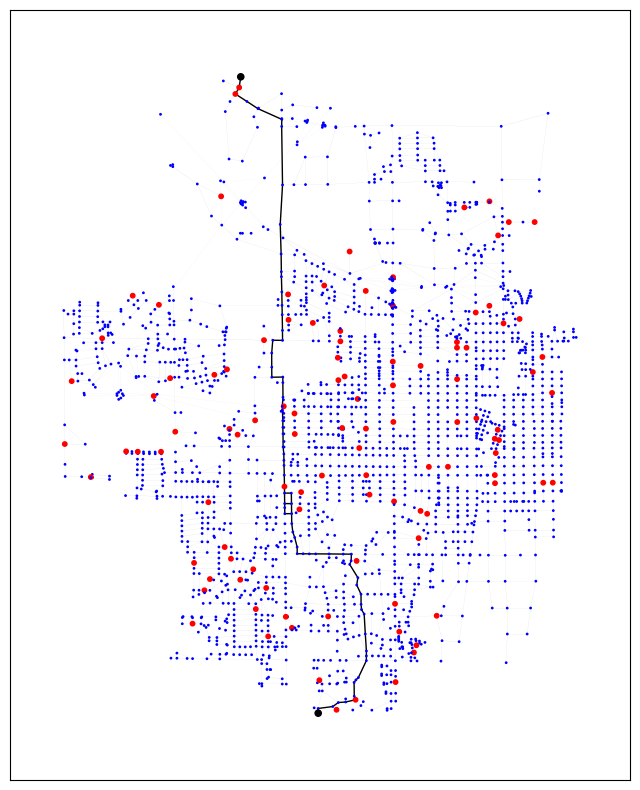

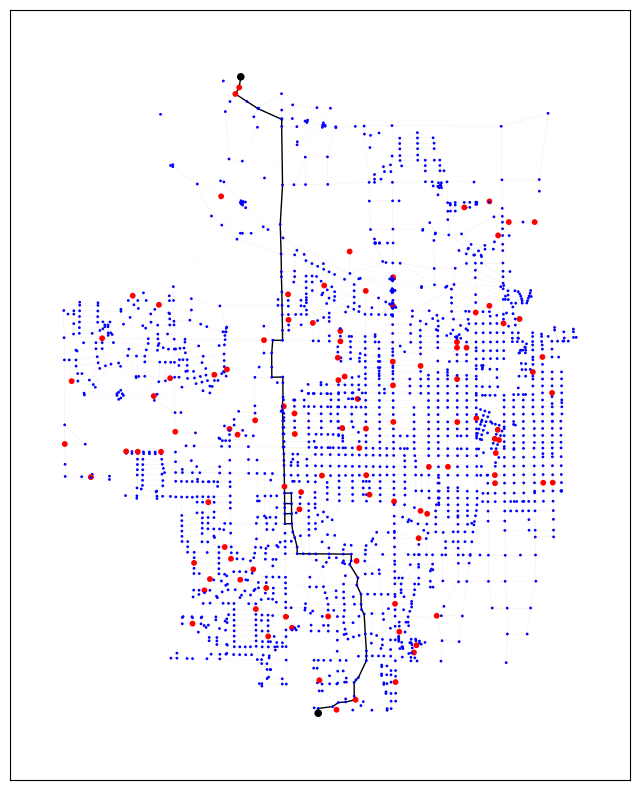

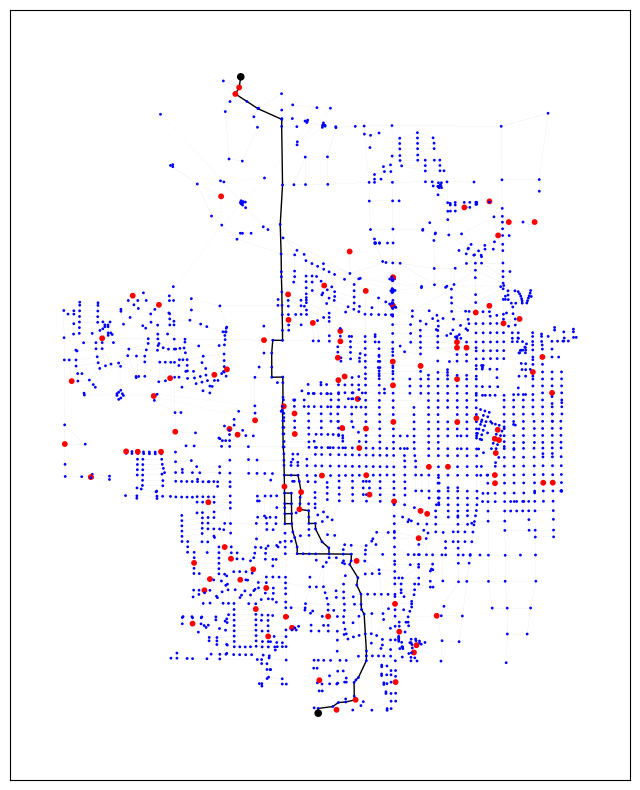

In [384]:
for path in paths:
    for i in range(1,len(path)):
        LineWidth[(path[i-1],path[i])]=1
    plist = list(LineWidth.values())
    myplot(G,pos,color, NodeSize, plist)
    # print(path)

## Gurobi Model
Inputs:
Shortest Path
Gas stations
networkx graph